#Libraries

In [15]:
# import additional stuff needed later on:
import json
import random
import time

In [16]:
# import Paillier library
!pip install phe
import phe
from phe import paillier

In [17]:
pubkey, privkey = paillier.generate_paillier_keypair(n_length=1024)

#Ruf

In [ ]:
print(1<<2)

4


In [ ]:
# p = privkey.p
# q = privkey.q

# g = pubkey.g
# n = pubkey.n

In [ ]:
m1 = 3.14
m2 = 10.02

M1 = pubkey.encrypt(m1)
M2 = pubkey.encrypt(m2)

In [ ]:
M3 = M1 + M2

# Create some constants
n1 = 2
n2 = 0.125

M4 = M1 * n1

M5 = M1 + n2

# Multiplication of two ciphertexts are not supported
# M6 = M1 * M2

In [ ]:
print(M3.ciphertext())
print(M4.ciphertext())
print(M5.ciphertext())

10336558875547105010174618853193895256038761986100757983497077911316302847021704181737648038279152009796504714359202632016303912754848260919274974341950324603655490636474739874061167278691138710160389714210135651324976177926500251723066751461860552747932525500707456144725311804342778813220341111210987204962543842384920333923983076389020401250466843169296756544325592853914712806095949227206102965238923845071124036628738915856363713513807855861292625918583405097613244511268020269659276326221751924959968430672868557112475255487167369263930596278303855358696782691558964453679372799508737512537116760082341484561435
6025023114792374677918507574796316824683542578171219766575923774880492537641288732989351384408530634614388226411314462358540168362522442450785420267795872162923176977940899749995210685914766324180994422429902475085899280278501007191514261529248916775054973028035105272612057021770102067883090127860148035994229537921199030320064226176535721973203145942924669708669062552682084096476

In [ ]:
m3 = privkey.decrypt(M3)
m4 = privkey.decrypt(M4)
m5 = privkey.decrypt(M5)

print(m3)
print(m4)
print(m5)

print("Original values:")
print(m1 + m2)
print(n1 * m1)
print(m1 + n2)

13.16
6.28
3.265
Original values:
13.16
6.28
3.265


In [ ]:
print("Public Key:")
print(pubkey.n)

print(pubkey.g)
print(pubkey.g - pubkey.n)
if pubkey.n%2:
    print("N is odd.")
print()

print("Private Key:")
print(privkey.p)
print(len(str(privkey.p)))
print(privkey.q)
print(len(str(privkey.q)))

Public Key:
111705681650899541427018611831395278407248379071717919441510087027386928470559752491067964547021300728766491874547473687369028898340372495744424381445984954636192224332866069887277708801528086464909586755353515467729839283032953914653080288445385821504511776656371592259530691057871070674850793512078251752801
309
111705681650899541427018611831395278407248379071717919441510087027386928470559752491067964547021300728766491874547473687369028898340372495744424381445984954636192224332866069887277708801528086464909586755353515467729839283032953914653080288445385821504511776656371592259530691057871070674850793512078251752802
1
N is odd.

Private Key:
9323315935036496772747573679871843795467547804328769145940535401334186828739243768493143396520404477027288217104257685166990948923760613509927299028423499
154
11981325359909329482369757279232980388330004020961292979394933321486497008857858593643006689951123028975268806578016950021813094910585051546040117481773699
155


1


In [ ]:
print("n")
print(pubkey.n)
print((pubkey.n).bit_length())

print("p")
print(privkey.p)
print((privkey.p).bit_length())

print("q")
print(privkey.q)
print((privkey.q).bit_length())


print("g")
print(pubkey.g)

print()
if(privkey.q * privkey.p == pubkey.n):
    print("p * q = n")
else:
    print("p * q not equal to n")

n
111705681650899541427018611831395278407248379071717919441510087027386928470559752491067964547021300728766491874547473687369028898340372495744424381445984954636192224332866069887277708801528086464909586755353515467729839283032953914653080288445385821504511776656371592259530691057871070674850793512078251752801
1024
p
9323315935036496772747573679871843795467547804328769145940535401334186828739243768493143396520404477027288217104257685166990948923760613509927299028423499
512
q
11981325359909329482369757279232980388330004020961292979394933321486497008857858593643006689951123028975268806578016950021813094910585051546040117481773699
512
g
111705681650899541427018611831395278407248379071717919441510087027386928470559752491067964547021300728766491874547473687369028898340372495744424381445984954636192224332866069887277708801528086464909586755353515467729839283032953914653080288445385821504511776656371592259530691057871070674850793512078251752802

p * q = n


In [ ]:
for i in range(4, 0, -1):
    print(i)

4
3
2
1


#SBDp

In [31]:
def Encrypted_LSB(T):
    # Bob:
    # r = random.randint(1, privkey.q)
    # r = random.randint(1, pubkey.n - 1)
    r = random.randint(1, 10000)
    E_r = pubkey.encrypt(r)
    # print("E12")
    Y = T + E_r

    # Alice:
    # print("E2")
    y = privkey.decrypt(Y)
    temp = 0
    if y%2:                 # y is odd
        temp = pubkey.encrypt(1)
    else:                   # y is even
        temp = pubkey.encrypt(0)

    # Bob:
    # print("E3")
    ans = 0
    if r%2:
        ans = pubkey.encrypt(1) - temp
    else:
        ans = temp
    return ans



def SVR(E_x, l1):
    # Bob:
    sum = 0
    t = 1
    for i in range(len(l1)):
        sum = sum + l1[i] * t
        t *= 2
    V = sum - E_x
    rr = random.randint(1, 1000)
    W = V * rr

    # Alice:
    D_W = privkey.decrypt(W)
    if D_W:
        return 0
    else:
        return 1

In [32]:
def SBD(E_x, m):

    # Stage 1:

    # l = n/2 + 1
    T = E_x
    l1 = []
    # print(1)
    for i in range(m):
        l1.append(Encrypted_LSB(T))
        # print(2)

        Z = T - l1[len(l1) - 1]
        T = Z / 2
        # print(3)
    # print(4)
    # Stage 2:

    gamma = SVR(E_x, l1)
    if gamma:
        return l1
    else:
        return SBD(E_x, m)

In [33]:
def CountSBD(E_x, m, count):

    # Stage 1:

    # l = n/2 + 1
    T = E_x
    l1 = []
    # print(1)
    for i in range(m):
        l1.append(Encrypted_LSB(T))
        # print(2)

        Z = T - l1[len(l1) - 1]
        T = Z / 2
        # print(3)
    # print(4)
    # Stage 2:

    gamma = SVR(E_x, l1)
    if gamma:
        return count + 1, l1
    else:
        return CountSBD(E_x, m, count + 1)

In [34]:
x = 183948

E_x = pubkey.encrypt(x)
m = x.bit_length()
count = 0
count, l1 = CountSBD(E_x, m, 0)
print("OUTPUT:")
print(count)
for i in range(len(l1) - 1, -1, -1):
    print(privkey.decrypt(l1[i]), end = "")

OUTPUT:
1
101100111010001100

In [ ]:
values_count = 3
l = random.sample(range(1, 101), values_count)
countl = []
totalC = 0

for x in l:
    E_x = pubkey.encrypt(x)
    m = x.bit_length()
    count = 0
    count, l1 = CountSBD(E_x, m, 0)
    countl.append([count, x])
    totalC += count

print("SBD runs for = ", totalC, "times.")
print("Average number of SBD calls = ", totalC/values_count)

SBD runs for =  3 times.
Average number of SBD calls =  1.0


#SBDv0

In [ ]:
def SBD_v0(E_X, m):
    Value_E_X = E_X
    l = []
# Stage 1:

    # Bob:
    # r = random.randint(1, pubkey.n - (2 ** m - 1) - 1)
    r = random.randint(1, 100)
    E_y = E_X + r

    # Alice:
    lam = 0
    y = privkey.decrypt(E_y)
    if(y % 2 == 0):
        lam = 0
    else:
        lam = 1
    lam_stage1 = lam
    E_lam = pubkey.encrypt(lam)

    # Bob:
    if(r%2 == 0):
        E_X = E_X + 1
        E_X = E_X - E_lam
    else:
        E_X = E_X + E_lam
    # print("Stage 1 complete")


# Stage 2:

    for i in range(m - 1, 0, -1):
        # Bob:
        # print(i, "1")

        r1 = random.randint(1, 10000)
        r2 = random.randint(1, 10000)
        r3 = random.randint(1, r2 - 1)
        y1 = 1<<(i)

        # E_T1 = pubkey.encrypt(0)
        # E_T2 = pubkey.encrypt(0)

        # E_T1 = E_X + r1
        # E_T1 = E_T1 * r2
        # E_T1 = E_T1 - r3

        # E_T2 = y1 + r1
        # E_T2 = E_T2 * r2

        E_T1 = (E_X + r1) * r2
        E_T2 = pubkey.encrypt((y1 + r1) * r2 + r3)

        B = random.randint(0, 1)
        # Z1, Z2 = pubkey.encrypt(0), pubkey.encrypt(0)
        # if B == 1:
        #     Z1 = pubkey.encrypt(0) + E_T1
        #     Z2 = pubkey.encrypt(0) + E_T2
        # else:
        #     Z1 = pubkey.encrypt(0) + E_T2
        #     Z2 = pubkey.encrypt(0) + E_T1

        Z1, Z2 = 0, 0
        if B == 1:
            Z1 = E_T1
            Z2 = E_T2
        else:
            Z1 = E_T2
            Z2 = E_T1

        # print(i, '2')

        # Alice:

        z1 = privkey.decrypt(Z1)
        # print(i, '21')
        z2 = privkey.decrypt(Z2)
        # print(i, '22')

        if(z1 > z2):
            lam = 1
        else:
            lam = 0
        # print(i, '23')
        E_lam = pubkey.encrypt(lam)


        # print(i, '3')

        # Bob:
        E_X_bit = 0
        if B == 1:
            E_X_bit = E_lam
        else:
            E_X_bit = pubkey.encrypt(1) - E_lam
        l.append(E_X_bit)
        E_X = E_X - E_X_bit * y1


    # Bob:
    if(r%2 == 0):
        E_X = E_X - 1
        E_X = E_X + lam_stage1
    else:
        E_X = E_X - lam_stage1

    l.append(E_X)
    # print("Stage 2 complete")




# Stage 3:

    # Bob:
    sum = pubkey.encrypt(0)
    t = 2**(m - 1)
    for i in range(0, m):
        sum = sum + l[i] * t
        t /= 2
    V = sum - Value_E_X
    rr = random.randint(1, 1000)
    W = V * rr

    # Alice:
    D_W = privkey.decrypt(W)
    if D_W:
        # print("Stage 3 complete")
        l = SBD_v0(pubkey, privkey, Value_E_X, m)
        return l
    else:
        # print("Stage 3 complete")
        return l


In [ ]:
X = 59
T = X
l2 = []
while T > 0:
    l2.append(T % 2)
    T = int(T/2)
l2.reverse()

print("Actual value of X in bit representatioin:")
for i in l2:
    print(i, end = "")
print()

print("Value that we found from SBD algorithm:")
E_X = pubkey.encrypt(X)
l = SBD_v0(E_X, X.bit_length())
for i in l:
    print(privkey.decrypt(i), end = "")

Actual value of X in bit representatioin:
111011
Value that we found from SBD algorithm:
111011

#SBDv1

In [ ]:
def SBD_v1(E_X, m):
    Value_E_X = E_X
    l = []
# Stage 1:

    # Bob:
    # r = random.randint(1, pubkey.n - (2 ** m - 1) - 1)
    r = random.randint(1, 10000)
    E_y = E_X + r

    # Alice:
    lam = 0
    y = privkey.decrypt(E_y)
    if(y % 2 == 0):
        lam = 0
    else:
        lam = 1
    lam_stage1 = lam
    E_lam = pubkey.encrypt(lam)

    # Bob:
    if(r%2 == 0):
        E_X = E_X + 1
        E_X = E_X - E_lam
    else:
        E_X = E_X + E_lam
    # print("Stage 1 complete")


# Stage 2:

    for i in range(m - 1, m - 2, -1):
        # Bob:
        # print(i, "1")

        r1 = random.randint(1, 10000)
        r2 = random.randint(1, 10000)
        r3 = random.randint(1, r2 - 1)
        y1 = 1<<(i)

        # E_T1 = pubkey.encrypt(0)
        # E_T2 = pubkey.encrypt(0)

        # E_T1 = E_X + r1
        # E_T1 = E_T1 * r2
        # E_T1 = E_T1 - r3

        # E_T2 = y1 + r1
        # E_T2 = E_T2 * r2

        E_T1 = (E_X + r1) * r2
        E_T2 = pubkey.encrypt((y1 + r1) * r2 + r3)

        B = random.randint(0, 1)
        # Z1, Z2 = pubkey.encrypt(0), pubkey.encrypt(0)
        # if B == 1:
        #     Z1 = pubkey.encrypt(0) + E_T1
        #     Z2 = pubkey.encrypt(0) + E_T2
        # else:
        #     Z1 = pubkey.encrypt(0) + E_T2
        #     Z2 = pubkey.encrypt(0) + E_T1

        Z1, Z2 = 0, 0
        if B == 1:
            Z1 = E_T1
            Z2 = E_T2
        else:
            Z1 = E_T2
            Z2 = E_T1

        # print(i, '2')

        # Alice:

        z1 = privkey.decrypt(Z1)
        # print(i, '21')
        z2 = privkey.decrypt(Z2)
        # print(i, '22')

        if(z1 > z2):
            lam = 1
        else:
            lam = 0
        # print(i, '23')
        E_lam = pubkey.encrypt(lam)


        # print(i, '3')

        # Bob:
        E_X_bit = 0
        if B == 1:
            E_X_bit = E_lam
        else:
            E_X_bit = pubkey.encrypt(1) - E_lam
        l.append(E_X_bit)
        E_X = E_X - E_X_bit * y1

    return l

In [ ]:
X = 32
print(X.bit_length())

E_X = pubkey.encrypt(X)
l = SBD_v1(E_X, X.bit_length())
for i in l:
    print(privkey.decrypt(i), end = "")

6
1

#Analysis

In [ ]:
range_of_bits = 16

In [ ]:
l = []
for i in range(range_of_bits):
    l.append(random.randint(1<<i, 1<<(i + 1)))
print(l)

[1, 3, 7, 8, 22, 39, 89, 169, 406, 822, 1412, 2799, 5817, 14181, 31828, 41319]


In [ ]:
# l = [1, 2, 6, 11, 27, 55, 79, 196, 347, 707]
# values_count = range_of_bits
# count = 0

In [ ]:
# SBDp
time_SBDp = []
for x in l:
    start_time = time.time()

    E_x = pubkey.encrypt(x)
    m = x.bit_length()
    count = 0
    count, l1 = CountSBD(E_x, m, 0)
    # countl.append([count, x])

    end_time = time.time()
    elapsed_time = end_time - start_time
    time_SBDp.append(elapsed_time)

print(time_SBDp)

[0.08431458473205566, 0.12470364570617676, 0.18395018577575684, 0.2231752872467041, 0.25490260124206543, 0.4215669631958008, 0.5542154312133789, 0.6422698497772217, 0.6800520420074463, 0.7278659343719482, 0.6566605567932129, 0.710923433303833, 0.9939939975738525, 0.9498140811920166, 0.9135425090789795, 1.008791446685791]


In [ ]:
# SBDv0
time_SBD_v0 = []
for x in l:
    start_time = time.time()

    E_x = pubkey.encrypt(x)
    m = x.bit_length()
    l1 = SBD_v0(E_x, m)

    end_time = time.time()
    elapsed_time = end_time - start_time
    time_SBD_v0.append(elapsed_time)

print(time_SBD_v0)

[0.06375956535339355, 0.1298508644104004, 0.17259430885314941, 0.2173457145690918, 0.3052046298980713, 0.3050844669342041, 0.38515448570251465, 0.4513232707977295, 0.4789700508117676, 0.5485641956329346, 0.5635178089141846, 0.6889712810516357, 0.8849196434020996, 1.085622787475586, 1.1080269813537598, 0.93320631980896]


In [ ]:
# SBDv1

time_SBD_v1 = []
for x in l:
    start_time = time.time()

    E_x = pubkey.encrypt(x)
    m = x.bit_length()
    l1 = SBD_v1(E_x, m)

    end_time = time.time()
    elapsed_time = end_time - start_time
    time_SBD_v1.append(elapsed_time)

print(time_SBD_v1)

[0.09871077537536621, 0.10063910484313965, 0.09936952590942383, 0.08091545104980469, 0.0993185043334961, 0.10286974906921387, 0.1011812686920166, 0.08586692810058594, 0.10557889938354492, 0.10166645050048828, 0.10404419898986816, 0.08171319961547852, 0.08272266387939453, 0.10189342498779297, 0.08305478096008301, 0.08227729797363281]


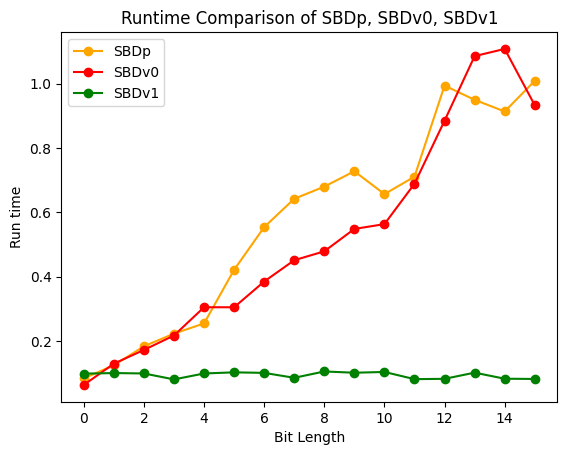

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array(time_SBDp)
plt.plot(t, color='orange', marker = 'o',label='SBDp')

t = np.array(time_SBD_v0)
plt.plot(t, color='red',marker = 'o',label='SBDv0')


t = np.array(time_SBD_v1)
plt.plot(t, color='green', marker = 'o',label='SBDv1')

plt.xlabel("Bit Length")
plt.ylabel("Run time")
plt.title("Runtime Comparison of SBDp, SBDv0, SBDv1")
plt.legend()
plt.show()